# Computer Vision Face recognition


## OpenCV



### Loading the dataset



In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
import zipfile
path =("/content/yalefaces (2).zip")
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

### Preprocessing the images


In [ ]:
import os 
print(os.listdir('/content/yalefaces/train'))

['subject10.normal.gif', 'subject05.wink.gif', 'subject04.happy.gif', 'subject14.happy.gif', 'subject15.glasses.gif', 'subject08.centerlight.gif', 'subject10.rightlight.gif', 'subject09.sleepy.gif', 'subject06.centerlight.gif', 'subject11.sad.gif', 'subject05.glasses.gif', 'subject06.noglasses.gif', 'subject07.wink.gif', 'subject11.noglasses.gif', 'subject06.sad.gif', 'subject09.glasses.gif', 'subject14.noglasses.gif', 'subject09.surprised.gif', 'subject02.wink.gif', 'subject04.rightlight.gif', 'subject13.leftlight.gif', 'subject09.normal.gif', 'subject07.centerlight.gif', 'subject12.happy.gif', 'subject08.wink.gif', 'subject09.leftlight.gif', 'subject06.surprised.gif', 'subject13.surprised.gif', 'subject05.sad.gif', 'subject06.sleepy.gif', 'subject05.rightlight.gif', 'subject02.normal.gif', 'subject10.happy.gif', 'subject08.sad.gif', 'subject11.normal.gif', 'subject08.surprised.gif', 'subject12.noglasses.gif', 'subject15.noglasses.gif', 'subject14.surprised.gif', 'subject09.wink.gif',

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ""))
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces



In [ ]:
ids , faces = get_image_data()

In [ ]:
ids, len(ids)

(array([10,  5,  4, 14, 15,  8, 10,  9,  6, 11,  5,  6,  7, 11,  6,  9, 14,
         9,  2,  4, 13,  9,  7, 12,  8,  9,  6, 13,  5,  6,  5,  2, 10,  8,
        11,  8, 12, 15, 14,  9, 12, 14,  2, 12, 13,  1,  3,  3, 13, 15,  9,
        15,  5,  3,  6,  1,  3, 12,  7, 10,  1,  1,  8, 13,  8, 14,  2, 10,
        13, 10,  1, 12,  2,  1,  6, 11,  9,  7,  7, 13,  4,  9,  3, 12, 11,
         5,  5, 15, 10,  8,  4, 10,  1,  3, 15,  7,  8, 12, 15, 10,  4, 11,
         3, 13,  2, 14, 11, 15,  4,  5,  7,  7,  7,  5, 14,  3, 13, 14,  4,
         2,  4,  2,  6, 11,  8, 11,  1,  6, 14,  2,  3,  1,  4, 15, 12]), 135)

In [ ]:
faces

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 244, 255, 255],
        [255, 255, 255, ..., 238, 242, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[117, 129, 130, ..., 255, 255, 255],
        [249, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,  93,  89,  90],
        [255, 255, 255, ..., 100,  96, 101],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 225, 236, 244],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [ ]:
len(faces)

135

### Training the LBPH classifier

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors = 14, grid_x= 9, grid_y = 9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognizing faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read("/content/lbph_classifier.yml")

In [ ]:
test_image = "/content/yalefaces/test/subject10.sad.gif"

In [ ]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, "uint8")
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
image_np.shape

(243, 320)

In [ ]:
prediction  = lbph_face_classifier.predict(image_np)
prediction

(10, 36.84750735484425)

In [ ]:
expected_output =int(os.path.split(test_image)[1].split('.')[0].replace("subject",""))
expected_output

10

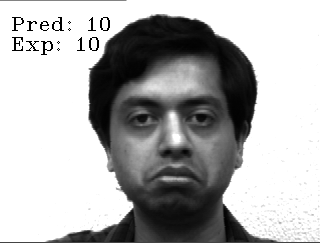

In [ ]:
cv2.putText(image_np, 'Pred: '+ str(prediction[0]),  (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: '+ str(expected_output),  (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evaluting the face classifier


In [ ]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []

for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, "uint8")
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',""))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
predictions

array([ 6, 11,  3,  4, 15, 13,  4,  4,  7, 12,  7,  4,  1,  5,  7, 12, 14,
        3,  9,  4, 14, 12, 10, 14,  4, 11,  9,  5, 13,  8])

In [ ]:
expected_outputs

array([ 6, 11,  3,  4, 15, 13,  1,  2,  9, 12, 15, 10,  1,  5,  7, 12, 14,
        3,  7,  8, 14,  2, 10,  6,  4, 11,  9,  5, 13,  8])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.7

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs,predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

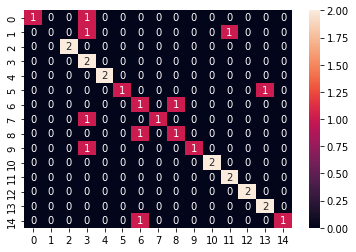

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True);

## DLIB

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

### Detecting facial points

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

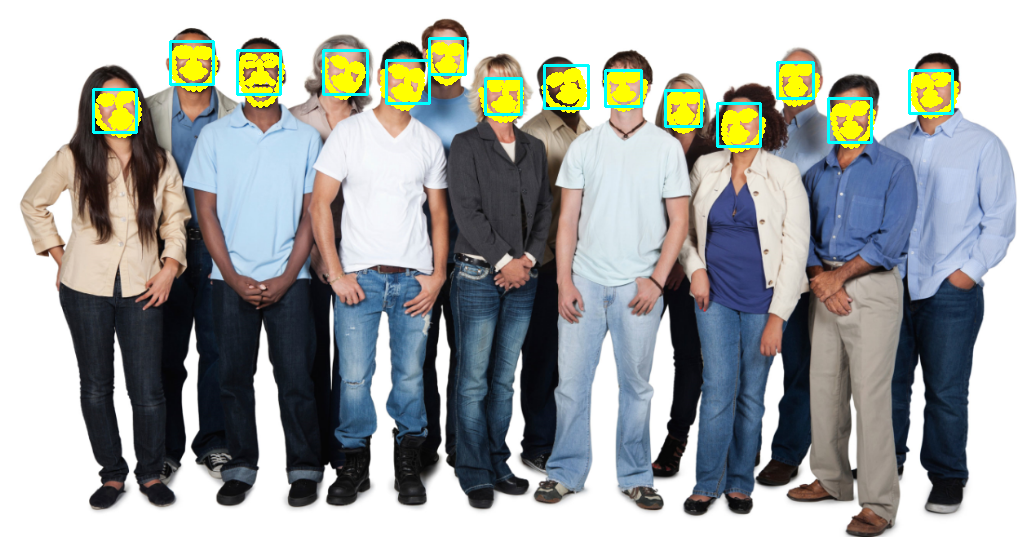

In [ ]:
image = cv2.imread('/content/people2.jpg')
face_detections = face_detector(image,1)

for face in face_detections:
  points  = points_detector(image, face)
  # print(points.parts())
  for point in points.parts():
    cv2.circle(image, (point.x, point.y),2,(0,255,255),2)
  l, r, t, b = face.left(), face.right(),face.top(), face.bottom()
  cv2.rectangle(image , (l , t), (r, b), (255,255),2)
cv2_imshow(image)

### Detecting Facial descriptors

In [ ]:
import os


In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")
face_descriptor_extractor = dlib.face_recognition_model_v1("/content/dlib_face_recognition_resnet_model_v1.dat")

In [ ]:
index = {}
idx = 0
face_descriptors  = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir("/content/yalefaces/train")]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np,1)
  for  face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l,t), (r,b),(0,255,0),2)
    points = points_detector(image_np,face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (255,0,0),1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
    face_descriptor = face_descriptor[np.newaxis,:]
    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = path
    idx += 1

  # cv2_imshow(image_np)


In [ ]:
index

{0: '/content/yalefaces/train/subject10.normal.gif',
 1: '/content/yalefaces/train/subject05.wink.gif',
 2: '/content/yalefaces/train/subject04.happy.gif',
 3: '/content/yalefaces/train/subject14.happy.gif',
 4: '/content/yalefaces/train/subject15.glasses.gif',
 5: '/content/yalefaces/train/subject08.centerlight.gif',
 6: '/content/yalefaces/train/subject10.rightlight.gif',
 7: '/content/yalefaces/train/subject09.sleepy.gif',
 8: '/content/yalefaces/train/subject06.centerlight.gif',
 9: '/content/yalefaces/train/subject11.sad.gif',
 10: '/content/yalefaces/train/subject05.glasses.gif',
 11: '/content/yalefaces/train/subject06.noglasses.gif',
 12: '/content/yalefaces/train/subject07.wink.gif',
 13: '/content/yalefaces/train/subject11.noglasses.gif',
 14: '/content/yalefaces/train/subject06.sad.gif',
 15: '/content/yalefaces/train/subject09.glasses.gif',
 16: '/content/yalefaces/train/subject14.noglasses.gif',
 17: '/content/yalefaces/train/subject09.surprised.gif',
 18: '/content/yalefa

### Calculating the distance between faces

In [ ]:
np.linalg.norm(face_descriptors[131]-face_descriptors[130])

0.6943641968498899

### Detecting faces with Dlib

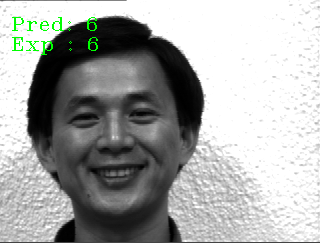

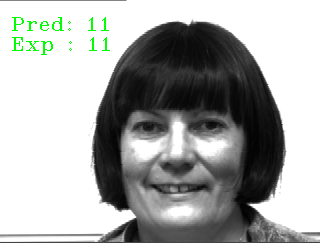

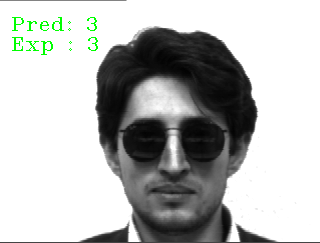

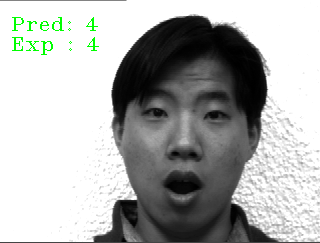

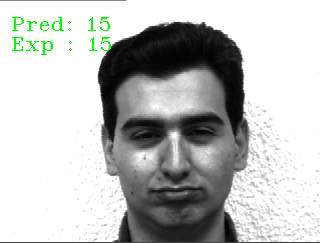

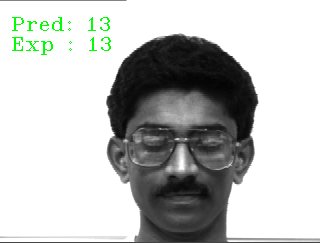

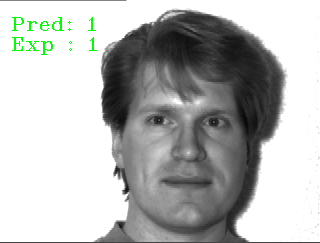

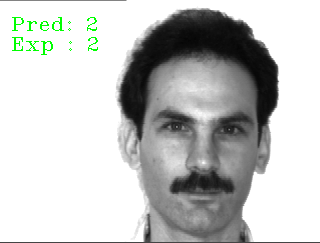

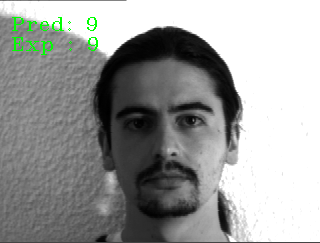

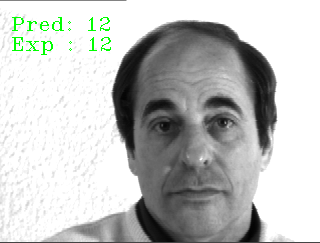

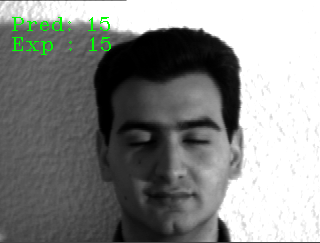

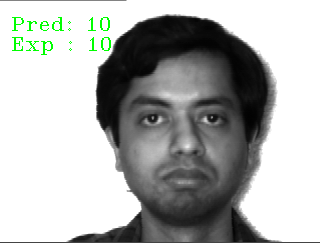

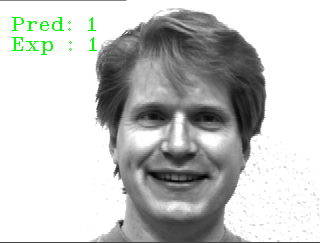

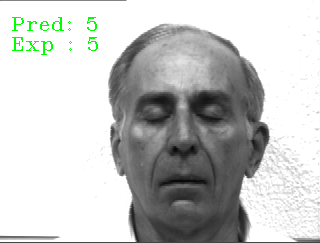

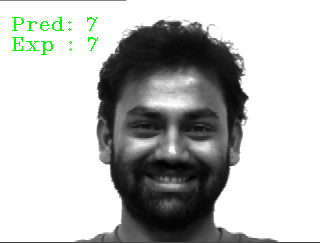

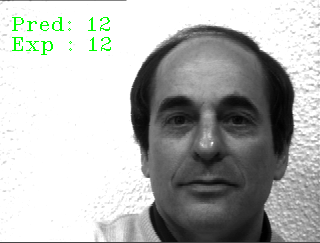

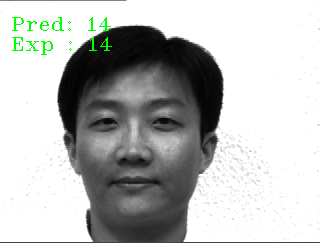

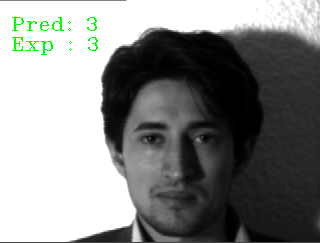

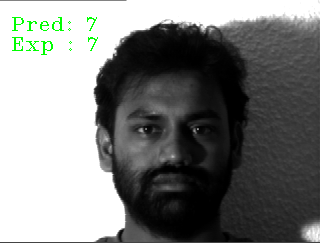

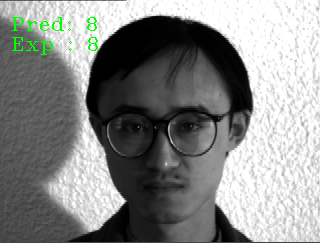

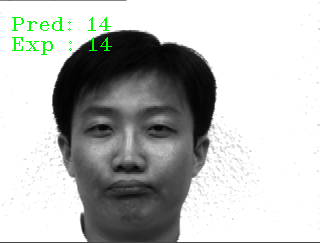

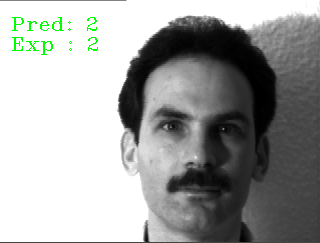

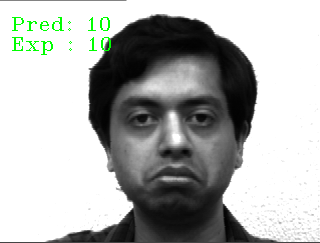

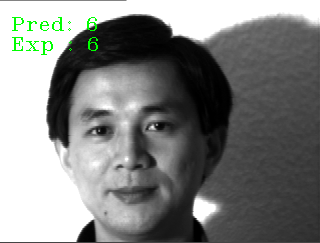

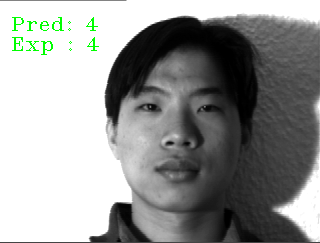

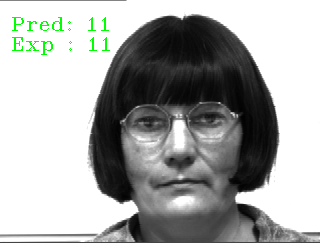

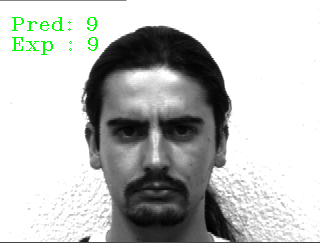

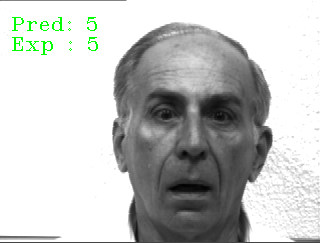

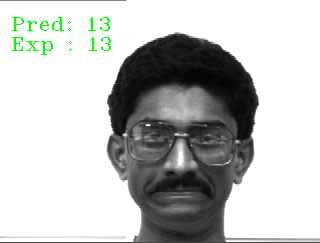

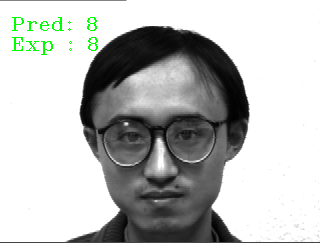

In [ ]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert("RGB")
  image_np = np.array(image,"uint8")
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = 'Not identified'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


  cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
predictions


array([ 6, 11,  3,  4, 15, 13,  1,  2,  9, 12, 15, 10,  1,  5,  7, 12, 14,
        3,  7,  8, 14,  2, 10,  6,  4, 11,  9,  5, 13,  8])

In [ ]:
expected_outputs

array([ 6, 11,  3,  4, 15, 13,  1,  2,  9, 12, 15, 10,  1,  5,  7, 12, 14,
        3,  7,  8, 14,  2, 10,  6,  4, 11,  9,  5, 13,  8])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

1.0